<a href="https://colab.research.google.com/github/SOORAJ-DSML/ML-AND-DL/blob/main/SOORAJ_V_ML_classification_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Task 2 - Classification

Build different classification models from historical data of patients and their responses to different medications. Then you use the trained algorithms to predict the class of an unknown patient or to find a proper drug for a new patient.

About the dataset
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.


Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.


You can use the training part of the dataset to build a logistic regression, decision tree, Random Forest, KNN, SVM, and Naive Bayes Classifiers and then use it to predict the class of an unknown patient, or to prescribe it to a new patient.


Downloading the Data
To download the data, we will use !wget to download it from IBM Object Storage.

!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv


Download dataset

In [ ]:
!wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

--2023-12-12 13:03:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6027 (5.9K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.89K  --.-KB/s    in 0s      

2023-12-12 13:03:25 (1.78 GB/s) - ‘drug200.csv’ saved [6027/6027]



##STEP-1: Importing Libraries & Data Set

In [ ]:
#import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Read the Data
df=pd.read_csv("drug200.csv")

##STEP-2:Exploratory Data Analysis (EDA)

In [ ]:
# Descriptive stats
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
df[df.isnull().any(axis=1)]
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Visulizations

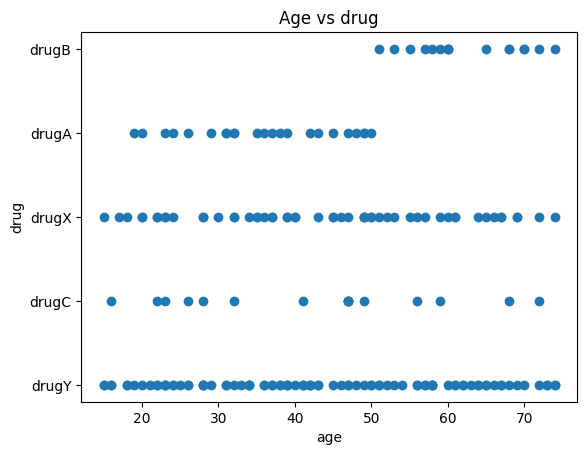

In [ ]:
# Age vs Charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('drug200.csv')
x=df['Age'].tolist()
y=df['Drug'].tolist()
plt.xlabel('age')
plt.ylabel('drug')
plt.title('Age vs drug')
plt.scatter(x,y)

# the more the age the more will be insurance charge


<BarContainer object of 200 artists>

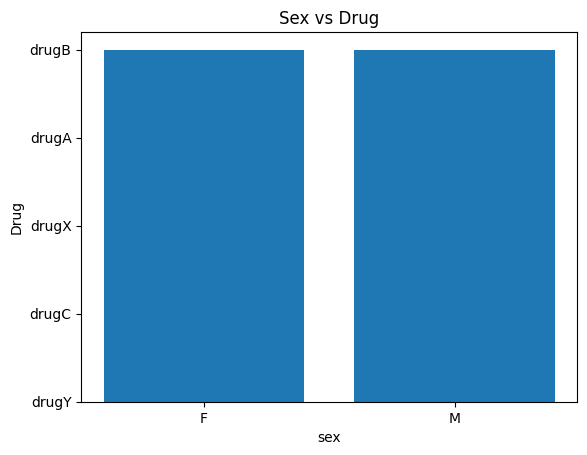

In [ ]:
#sex vs charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('drug200.csv')
x=df['Sex'].tolist()
y=df['Drug'].tolist()
plt.xlabel('sex')
plt.ylabel('Drug')
plt.title('Sex vs Drug')
plt.bar(x,y)
# males insurance charges more than females.

<BarContainer object of 200 artists>

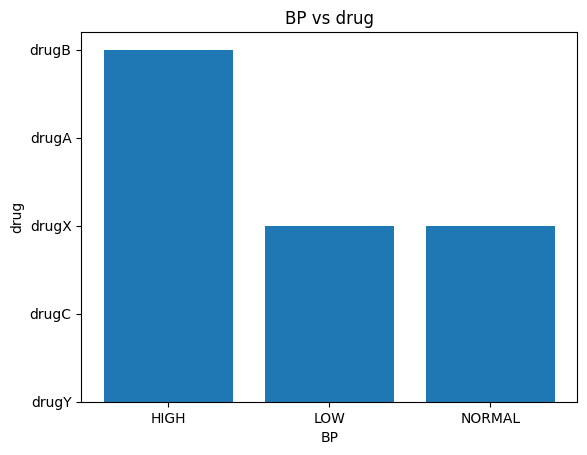

In [ ]:
# smoker vs charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('drug200.csv')
x=df['BP'].tolist()
y=df['Drug'].tolist()
plt.xlabel('BP')
plt.ylabel('drug')
plt.title('BP vs drug')
plt.bar(x,y)
# smokers have more insurance charges than the non smokers

<BarContainer object of 200 artists>

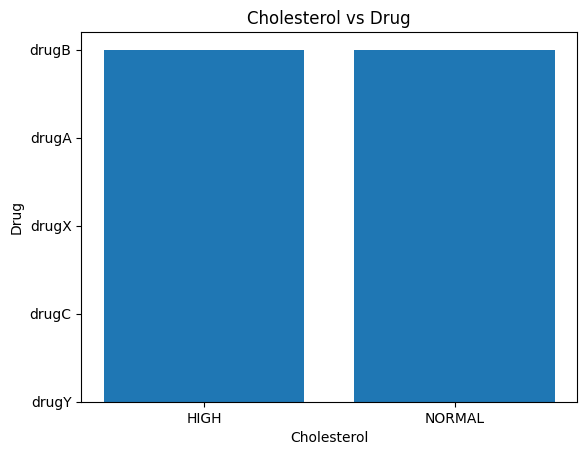

In [ ]:
# region vs charges
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('drug200.csv')
x=df['Cholesterol'].tolist()
y=df['Drug'].tolist()
plt.xlabel('Cholesterol')
plt.ylabel('Drug')
plt.title('Cholesterol vs Drug')
plt.bar(x,y)
# region actually does not play any role in determining the insurance charges

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

##STEP-4 : Fit the Model & Predict , check the Accuracy

##Logical Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train,y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score,average_precision_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))



              precision    recall  f1-score   support

       drugA       1.00      0.80      0.89         5
       drugB       0.50      0.67      0.57         3
       drugC       1.00      0.75      0.86         4
       drugX       0.89      0.94      0.92        18
       drugY       0.90      0.90      0.90        30

    accuracy                           0.88        60
   macro avg       0.86      0.81      0.83        60
weighted avg       0.89      0.88      0.89        60

[[ 4  1  0  0  0]
 [ 0  2  0  0  1]
 [ 0  0  3  0  1]
 [ 0  0  0 17  1]
 [ 0  1  0  2 27]]
Logistic Regression accuracy is: 88.33%


##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)
y_pred = DTclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))


              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Decision Tree accuracy is: 100.00%


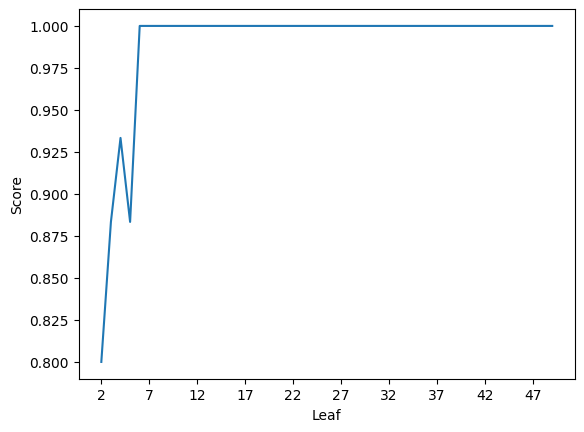

DT Acc Max 100.00%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

[Text(0.6666666666666666, 0.9, 'x[1] <= 14.829\ngini = 0.712\nsamples = 140\nvalue = [18, 13, 12, 36, 61]'),
 Text(0.5555555555555556, 0.7, 'x[4] <= 0.5\ngini = 0.69\nsamples = 79\nvalue = [18, 13, 12, 36, 0]'),
 Text(0.3333333333333333, 0.5, 'x[6] <= 0.5\ngini = 0.375\nsamples = 48\nvalue = [0, 0, 12, 36, 0]'),
 Text(0.2222222222222222, 0.3, 'x[7] <= 0.5\ngini = 0.499\nsamples = 23\nvalue = [0, 0, 12, 11, 0]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 0, 11, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [0, 0, 12, 0, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 0, 25, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 50.5\ngini = 0.487\nsamples = 31\nvalue = [18, 13, 0, 0, 0]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0, 0, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0, 0]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples

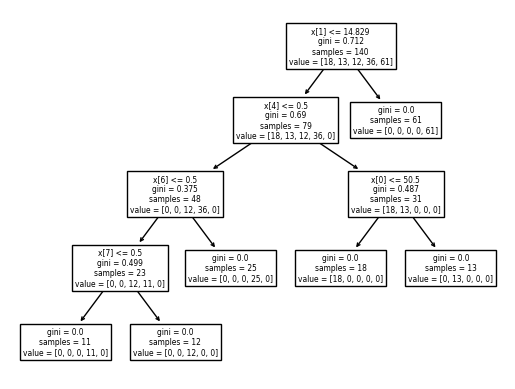

In [ ]:
from sklearn.tree import plot_tree
plot_tree(DTclassifier)

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        30

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 30]]
Random Forest accuracy is: 100.00%


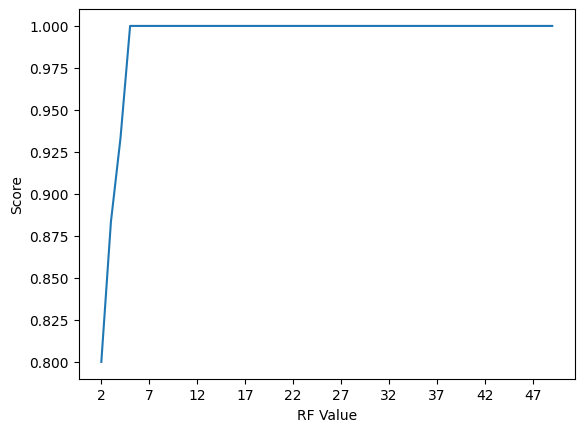

RF Acc Max 100.00%


In [ ]:
scoreListRF = []
for i in range(2,50):
    RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))

plt.plot(range(2,50), scoreListRF)
plt.xticks(np.arange(2,50,5))
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAccMax = max(scoreListRF)
print("RF Acc Max {:.2f}%".format(RFAccMax*100))

# Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)
y_pred = SVCclassifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         5
       drugB       0.75      1.00      0.86         3
       drugC       1.00      1.00      1.00         4
       drugX       1.00      1.00      1.00        18
       drugY       1.00      0.97      0.98        30

    accuracy                           0.98        60
   macro avg       0.95      0.99      0.97        60
weighted avg       0.99      0.98      0.98        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 0  1  0  0 29]]
SVC accuracy is: 98.33%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         5
       drugB       0.29      0.67      0.40         3
       drugC       0.00      0.00      0.00         4
       drugX       0.53      0.50      0.51        18
       drugY       1.00      0.90      0.95        30

    accuracy                           0.63        60
   macro avg       0.36      0.41      0.37        60
weighted avg       0.67      0.63      0.65        60

[[ 0  0  0  5  0]
 [ 0  2  0  1  0]
 [ 2  0  0  2  0]
 [ 6  3  0  9  0]
 [ 1  2  0  0 27]]
K Neighbours accuracy is: 63.33%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


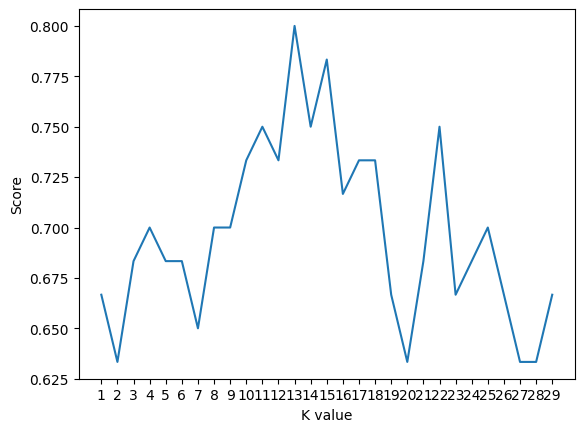

KNN Acc Max 80.00%


In [ ]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))

plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

# Naive bayes

In [ ]:
#Gaussian nb
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       drugA       0.56      1.00      0.71         5
       drugB       0.60      1.00      0.75         3
       drugC       0.57      1.00      0.73         4
       drugX       0.75      1.00      0.86        18
       drugY       1.00      0.50      0.67        30

    accuracy                           0.75        60
   macro avg       0.70      0.90      0.74        60
weighted avg       0.84      0.75      0.74        60

[[ 5  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 18  0]
 [ 4  2  3  6 15]]
Gaussian Naive Bayes accuracy is: 75.00%


# Model comparison

In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'K Neighbors Max', 'SVM',
                                  'Gaussian NB', 'Decision Tree', 'Decision Tree Max', 'Random Forest', 'Random Forest Max'],
                        'Accuracy': [LRAcc*100, KNAcc*100, KNAccMax*100, SVCAcc*100,  NBAcc2*100, DTAcc*100, DTAccMax*100, RFAcc*100, RFAccMax*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
5,Decision Tree,100.000000
6,Decision Tree Max,100.000000
7,Random Forest,100.000000
8,Random Forest Max,100.000000
3,SVM,98.333333
0,Logistic Regression,88.333333
2,K Neighbors Max,80.000000
4,Gaussian NB,75.000000
1,K Neighbors,63.333333
